In [ ]:
#Pkg.clone("git://github.com/denizyuret/Knet.jl.git")
#Pkg.checkout("Knet", "handout-mtg")
Pkg.build("Knet")

In [ ]:
include(Pkg.dir("Knet/examples/adding.jl"))
#import Knet

In [ ]:
using Knet

In [ ]:
prog = quote
    x = input()
    w = par(size(x),0)
    x1 = dot(x,w)
    b = par(0)
    x2 = add(b,x1)
    y = tanh(x2)
end

In [ ]:
Net(prog)

In [ ]:
using Mocha

In [ ]:
using PyPlot

In [ ]:
function ground_truth(x::Array)
    return 1./(x.^2 + 1);
end


function simulate_data(x::Array)
    noise_ampl = 0.01;
    return [ground_truth xi for xi in x] + noise_ampl*randn(size(x));
end


x = shuffle(collect(-pi:0.01:2*pi));
y = simulate_data(x);
#plot(x,y)

In [ ]:

data_layer = MemoryDataLayer(batch_size=1,data = Array[x,y],tops = [:data,:truth])
    
common_layers = [
    InnerProductLayer(name = "prod",output_dim = 100,neuron = Neurons.Tanh(),
    tops = [:output1],bottoms = [:data])
    InnerProductLayer(name = "prod2",output_dim = 1,
    tops = [:output],bottoms = [:output1])


]

loss_layer = SquareLossLayer(bottoms = [:output,:truth])

backend = CPUBackend()
init(backend)

net = Net("train-net",backend,[data_layer,common_layers...,loss_layer]);


method = SGD()
solver_params = Mocha.make_solver_parameters(method, batch_size=10, max_iter=100*length(x),
regu_coef=0.001, momentum=0.0,lr_policy=LRPolicy.Fixed(0.001),
    load_from="snapshots")
solver = Solver(method,solver_params)
add_coffee_break(solver, TrainingSummary(), every_n_iter=10*length(x))
solve(solver,net);

In [ ]:
x_test = collect(-2*pi:0.01:2*pi)
y_test = ground_truth(x_test)

data_layer_test = MemoryDataLayer(name="test-data",batch_size=1,data = Array[x_test,y_test],tops = [:data,:truth])
acc_layer = AccuracyLayer(name="test-accuracy", bottoms=[:output, :truth])

test_net = Net("testing-net", backend, [data_layer_test, common_layers..., acc_layer])


yt = similar(x_test)
yp = similar(x_test)
xt = similar(x_test)


for i in 1:length(x_test)
    forward(test_net)
    xt[i] = test_net.output_blobs[:data].data[1]
    yt[i] = test_net.output_blobs[:truth].data[1]
    yp[i] = test_net.output_blobs[:output].data[1]
end

plot(xt,yt)
plot(xt,yp)
plot(x,y,".",markersize=1)

In [ ]:
using Images
open("net.dot", "w") do out net2dot(out, net) end
run(`dot -Tpng net.dot` |> "net.png")
Images.imread("net.png")

In [ ]:
data_layer_test = MemoryDataLayer(name="test-data",batch_size=1,data = Array[x,y],tops = [:data,:truth])
acc_layer = AccuracyLayer(name="test-accuracy", bottoms=[:output, :truth])

test_net = Net("testing-net", backend, [data_layer_test, common_layers..., acc_layer])

In [ ]:
net.layers[2].w

# MXNet

In [1]:
#Pkg.clone("git://github.com/dmlc/MXNet.jl.git")
using MXNet

INFO: Recompiling stale cache file /home/julian/.julia/lib/v0.4/MXNet.ji for module MXNet.


In [61]:
data = mx.Variable(:data)
fc1  = mx.FullyConnected(data = data, name=:fc1, num_hidden=10)
act1 = mx.Activation(data = fc1, name=:relu1, act_type=:tanh)
fc2  = mx.FullyConnected(data = act1, name=:fc2, num_hidden=1)
# act2 = mx.Activation(data = fc2, name=:relu2, act_type=:tanh)
#fc3  = mx.FullyConnected(data = act2,name=:fc3, num_hidden=1)
mlp = mx.LinearRegressionOutput(data = fc2, name=:end)

MXNet.mx.Symbol(MXNet.mx.MX_SymbolHandle(Ptr{Void} @0x000000000a869670))

In [80]:
function ground_truth(x)
    return sin(4*x)
end



function simulate_data(x::Array)
    noise_ampl = 0.01;
    return map(Float32,ground_truth(x + noise_ampl*randn(size(x))))
end


x = Array(shuffle(collect(Float32,-1:0.01:1)));
y = Array(Float32,size(x))
y[:] =simulate_data(x);


xs = ones((length(x),1))
for (i,xi) in enumerate(x)
    xs[i,1] = xi
end

In [93]:
batch_size = 20
#include("mnist-data.jl")
train_provider = mx.ArrayDataProvider(Pair(:data,x'),Pair(:end_label,y))
model = mx.FeedForward(mlp, context=mx.cpu())
optimizer = mx.SGD(lr=0.02, momentum=0.9, weight_decay=0.00001)
mx.fit(model, optimizer, train_provider, n_epoch=100,eval_metric=mx.Accuracy())

INFO: Start training on [CPU0]
INFO: Initializing parameters...
INFO: Creating KVStore...
INFO: == Epoch 001 ==========
INFO: ## Training summary
INFO:       :accuracy = 0.0000
INFO:            time = 0.1838 seconds
INFO: == Epoch 002 ==========
INFO: ## Training summary
INFO:       :accuracy = 0.0000
INFO:            time = 0.1808 seconds
INFO: == Epoch 003 ==========
INFO: ## Training summary
INFO:       :accuracy = 0.0000
INFO:            time = 0.1158 seconds
INFO: == Epoch 004 ==========
INFO: ## Training summary
INFO:       :accuracy = 0.0000
INFO:            time = 0.1099 seconds
INFO: == Epoch 005 ==========
INFO: ## Training summary
INFO:       :accuracy = 0.0000
INFO:            time = 0.1072 seconds
INFO: == Epoch 006 ==========
INFO: ## Training summary
INFO:       :accuracy = 0.0000
INFO:            time = 0.1552 seconds
INFO: == Epoch 007 ==========
INFO: ## Training summary
INFO:       :accuracy = 0.0000
INFO:            time = 0.1124 seconds
INFO: == Epoch 008 =========

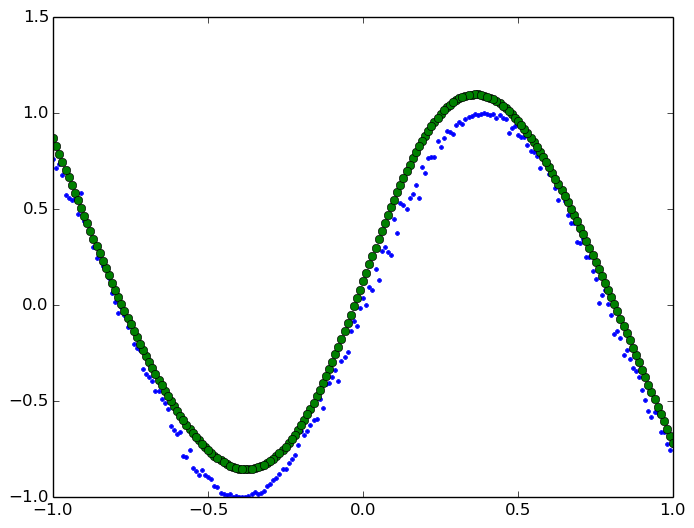

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0xe195290>

INFO:       :accuracy = 0.0000
INFO:            time = 0.1133 seconds


In [94]:
using PyPlot
plot(x,y,".")
plot(x,mx.predict(model,train_provider)',"o")

In [ ]:
@show model.arg_params
@show copy(model.arg_params[:fc3_bias])

In [ ]:
mx.fit(model, optimizer, train_provider, n_epoch=50,eval_metric=Loss())

In [11]:
mx.infer_shape(mlp,data = size(xs')),ys

LoadError: LoadError: UndefVarError: ys not defined
while loading In[11], in expression starting on line 1

In [ ]:
length(x)

In [ ]:
Loss <: mx.AbstractEvalMetric

In [20]:
ys = reshape(y,(1,length(y)))

1x201 Array{Float32,2}:
 3.0  1.0  1.0  3.0  1.0  1.0  3.0  3.0  …  3.0  3.0  1.0  1.0  1.0  1.0  3.0

In [ ]:
type Loss <: mx.AbstractEvalMetric
    loss_ave  :: Float64
  n_sample :: Int

    Loss() = new(0.0, 0)
end

function _update_single_output(metric :: Loss, label :: mx.NDArray, pred :: mx.NDArray)
  label = copy(label)
  pred  = copy(pred)

  n_sample = size(pred)[end]
  metric.n_sample += n_sample
    metric.loss_ave += norm(label-pred)
    #println("$(sub(pred,:,i)) $(klass-1) <=> $(label[i])")
end

function update!(metric :: Loss, labels :: Vector{mx.NDArray}, preds :: Vector{mx.NDArray})
  @assert length(labels) == length(preds)
  for i = 1:length(labels)
    _update_single_output(metric, labels[i], preds[i])
  end
end

import Base: get
function get(metric :: Loss)
    return [(:accuracy, metric.loss_ave / metric.n_sample)]
end

function reset!(metric :: Loss)
    metric.loss_ave  = 0.0
  metric.n_sample = 0
end


In [ ]:
isa(ev,mx.AbstractEvalMetric)

In [ ]:
reset!(ev)

In [45]:
xss = Vector()
yss = Vector()


0-element Array{Any,1}

In [46]:
for xi in x
    push!(xss,[xi])
end

for yi in y
    push!(yss,[yi])
end

In [13]:
norm(zeros(2,2))

0.0

In [ ]:
B